# Read and Parse Chainer logs

# CIFAR100 runs with same hyper-parameters
## 24 runs x 500 epochs on DL server 
b512 l0.15

### Fix LR after 4 updates (after 25 x 4 epochs)

In [14]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import subprocess
import os
import itertools

In [129]:
!ls logs/series/experiment03

cifar_fixLR_e500_run_0.log  cifar_fixLR_e500_run_2.log
cifar_fixLR_e500_run_1.log  cifar_fixLR_e500_run_20.log
cifar_fixLR_e500_run_10.log cifar_fixLR_e500_run_21.log
cifar_fixLR_e500_run_11.log cifar_fixLR_e500_run_22.log
cifar_fixLR_e500_run_12.log cifar_fixLR_e500_run_23.log
cifar_fixLR_e500_run_13.log cifar_fixLR_e500_run_3.log
cifar_fixLR_e500_run_14.log cifar_fixLR_e500_run_4.log
cifar_fixLR_e500_run_15.log cifar_fixLR_e500_run_5.log
cifar_fixLR_e500_run_16.log cifar_fixLR_e500_run_6.log
cifar_fixLR_e500_run_17.log cifar_fixLR_e500_run_7.log
cifar_fixLR_e500_run_18.log cifar_fixLR_e500_run_8.log
cifar_fixLR_e500_run_19.log cifar_fixLR_e500_run_9.log


In [130]:
filename_pattern=re.compile(r"cifar_fixLR_e500.*\.log")

In [131]:
logs_directory =  "logs/series/experiment03"
list_command = "ls -1 "+logs_directory
files=[]
proc = subprocess.Popen(list_command.split(" "),
                     stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
for line in iter(proc.stdout.readline,b''):
    line = line.strip(" \n")
    m = filename_pattern.match(line)
    if m:
        files.append(os.path.abspath(os.path.join(logs_directory,line)))
#files

In [132]:
run_pattern = re.compile(r"cifar_.*run_(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")
def fileToDF(logfile):
    remove_str="[J"
    global run_pattern
    global output_pattern
    m = run_pattern.search(logfile)
    if m:
        run = int(m.group(1))        
    else:
        print "No match in filename:",logfile
        return None
    with open(logfile,"r") as f:
        lines = f.readlines()
        batch = 0
        epoch = 0
        ind = 0
        loss = 0
        acc = 0
        learn = 0
        time = 0
        df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
        for line in lines:
            s = line.strip(' \n')
            s = s.replace(remove_str,"")
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                loss = float(m.group(3))
                acc = float(m.group(5))
                time = float(m.group(6))
                #print batch,learn,loss,acc,time
                df.loc[ind] = [run,epoch,loss,acc,time]
                ind += 1
                    
    return df

In [133]:
df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
for file in files:
#print files[2]
    df1 = fileToDF(file)
    #print df1.head()
    if len(df1) > 0:
        df = pd.concat([df,df1],ignore_index=True)
print df.shape
df.head()

(12000, 5)


,run,epoch,loss,acc,time
0,0.0,1.0,4.58775,0.012086,24.1540
1,0.0,2.0,4.67405,0.010892,47.7167
2,0.0,3.0,4.52949,0.024345,71.2630
3,0.0,4.0,4.73494,0.014005,95.1632
4,0.0,5.0,4.22076,0.035553,119.1810


In [7]:
df_loss = df.pivot(index="epoch",columns="run")["loss"]
df_acc = df.pivot(index="epoch",columns="run",values="acc")
df_time = df.pivot(index="epoch",columns="run",values="time")
df_acc.head()

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
epoch,,,,,,,,,,,,,,,,,,,,,
1.0,0.012086,0.010380,0.009168,0.011173,0.012173,0.010197,0.014591,0.018974,0.012638,0.013701,...,0.010352,0.014861,0.008657,0.009938,0.012552,0.010024,0.011684,0.013029,0.009938,0.016033
2.0,0.010892,0.013919,0.016739,0.010317,0.019009,0.010110,0.010587,0.021146,0.010587,0.013701,...,0.017044,0.020514,0.023334,0.010024,0.009852,0.009938,0.015838,0.013942,0.022076,0.014591
3.0,0.024345,0.021697,0.017997,0.010208,0.028510,0.012063,0.026603,0.034857,0.012649,0.016607,...,0.030710,0.021025,0.025299,0.010599,0.022909,0.010306,0.019290,0.030808,0.031319,0.019801
4.0,0.014005,0.030308,0.034295,0.013212,0.024161,0.016923,0.032893,0.039803,0.013919,0.017228,...,0.038838,0.033410,0.035030,0.014384,0.014591,0.012356,0.027838,0.032738,0.037310,0.027568
5.0,0.035553,0.021404,0.026792,0.018899,0.025276,0.015493,0.041245,0.058410,0.025236,0.014200,...,0.043658,0.032611,0.039476,0.028596,0.027826,0.020623,0.035495,0.034019,0.045399,0.028487


In [8]:
df_time.tail()

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
epoch,,,,,,,,,,,,,,,,,,,,,
496.0,11909.9,11926.4,11930.2,11833.0,12060.7,11869.0,11850.2,11787.2,11792.8,11842.3,...,11945.1,12067.5,11778.1,11832.7,11860.2,11851.9,11912.3,11915.8,11928.3,12056.6
497.0,11934.1,11950.6,11954.4,11856.9,12085.1,11893.0,11874.2,11811.0,11816.7,11866.3,...,11969.2,12091.9,11801.9,11856.6,11884.1,11875.8,11936.3,11939.9,11952.4,12080.9
498.0,11957.9,11974.5,11978.3,11880.7,12109.3,11916.8,11897.9,11834.7,11840.3,11890.0,...,11993.1,12116.1,11825.5,11880.3,11907.8,11899.6,11960.0,11963.7,11976.2,12104.9
499.0,11982.1,11998.6,12002.4,11904.6,12133.7,11940.9,11921.9,11858.5,11864.1,11914.0,...,12017.3,12140.5,11849.3,11904.3,11931.8,11923.5,11984.0,11987.8,12000.3,12129.1
500.0,12006.2,12022.8,12026.6,11928.6,12158.1,11964.9,11945.9,11882.4,11888.0,11937.9,...,12041.4,12164.9,11873.1,11928.2,11955.7,11947.5,12008.0,12011.9,12024.3,12153.3


In [105]:
def plot(df,**kwargs):
    ax = df.plot(**kwargs)
    ax.set_xlim(0,500)
    major = np.arange(0,501,100)
    ax.set_xticks(major)
    ax.xaxis.grid(which="major", linestyle=":",color="#cccccc")
    minor = np.arange(25,476,25)
    ax.set_xticks(minor, minor=True)
    ax.xaxis.grid(which="minor", linestyle=":",color="#cccccc",alpha=0.5)
    ax.yaxis.grid(linestyle="-",color="black",alpha=0.05)
    return ax

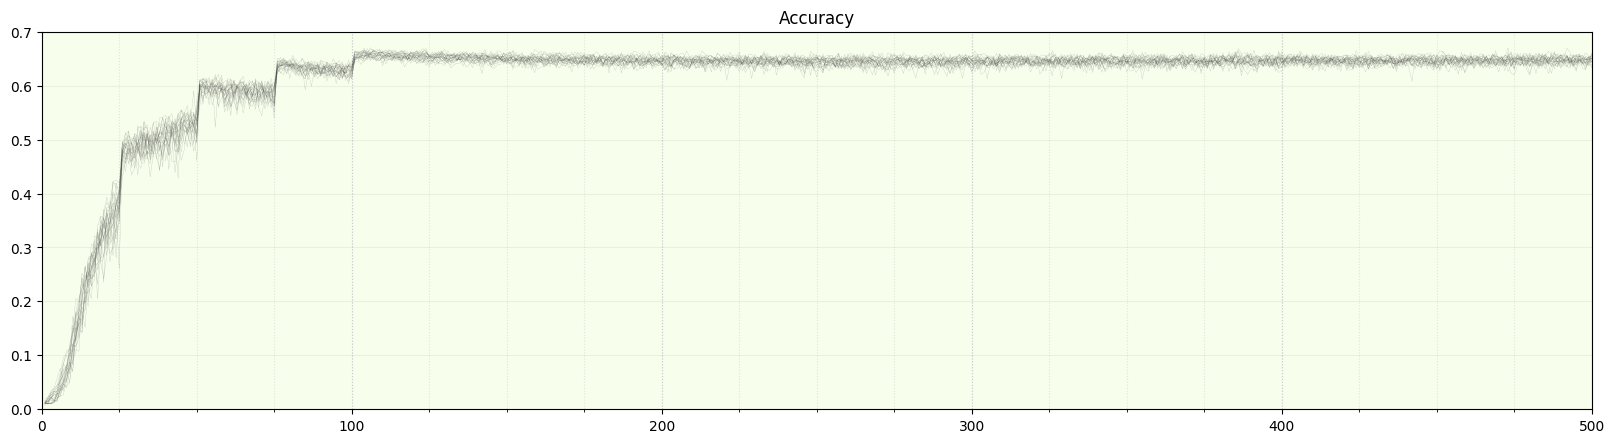

In [137]:
ax = plot(df_acc,legend=False,figsize=(20,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_ylim(0,.7)
ax.set_facecolor("#F7FEEB")

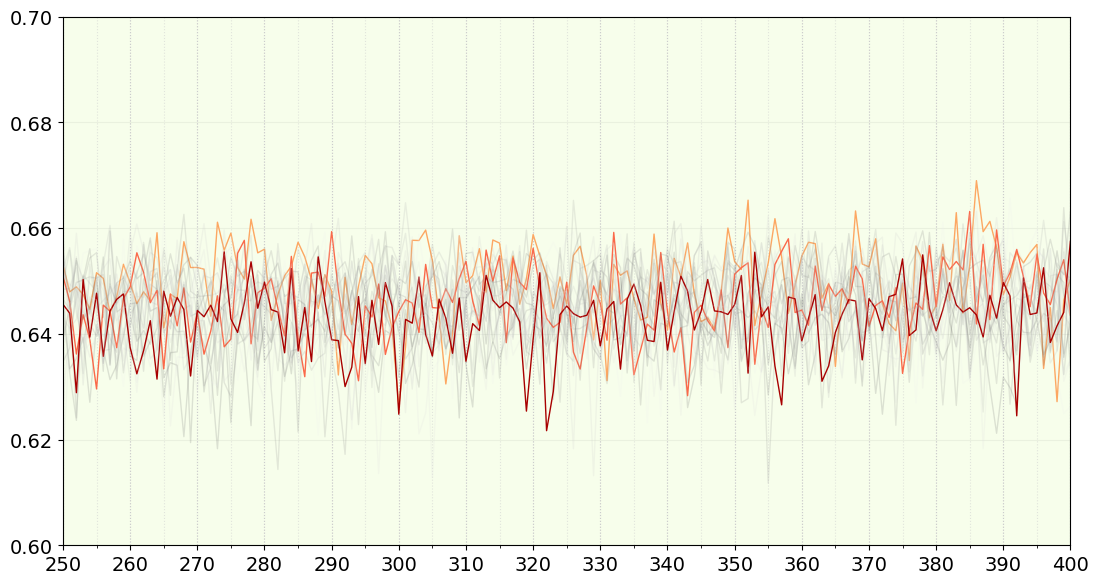

In [143]:
color_0 = [.4]
color_1 = (np.arange(1,10,dtype=float)) / 16
color_2 = [.5]
color_3 = [.9]
colors0 = cm.Oranges(color_0)
colors1 = cm.binary(color_1,alpha=0.2)
colors2 = cm.Reds(color_2)
colors3 = cm.OrRd(color_3)
colors = np.vstack((colors0,colors1,colors2,colors1,colors3,colors1))

default_FS = matplotlib.rcParams["font.size"]
matplotlib.rcParams.update({'font.size': 14})
ax = plot(df_acc,legend=False,figsize=(13,7),linewidth=1,color=colors)
ax.set_xlabel("")
ax.set_ylim(.6,.7)
ax.set_xlim(250,400)
ax.set_facecolor("#F7FEEB")
#ax.legend()
ax.set_xticks(np.arange(250,405,10))
ax.set_xticks(np.arange(250,405,5),minor=True)#.set_fontsize(20)
matplotlib.rcParams.update({'font.size': default_FS})

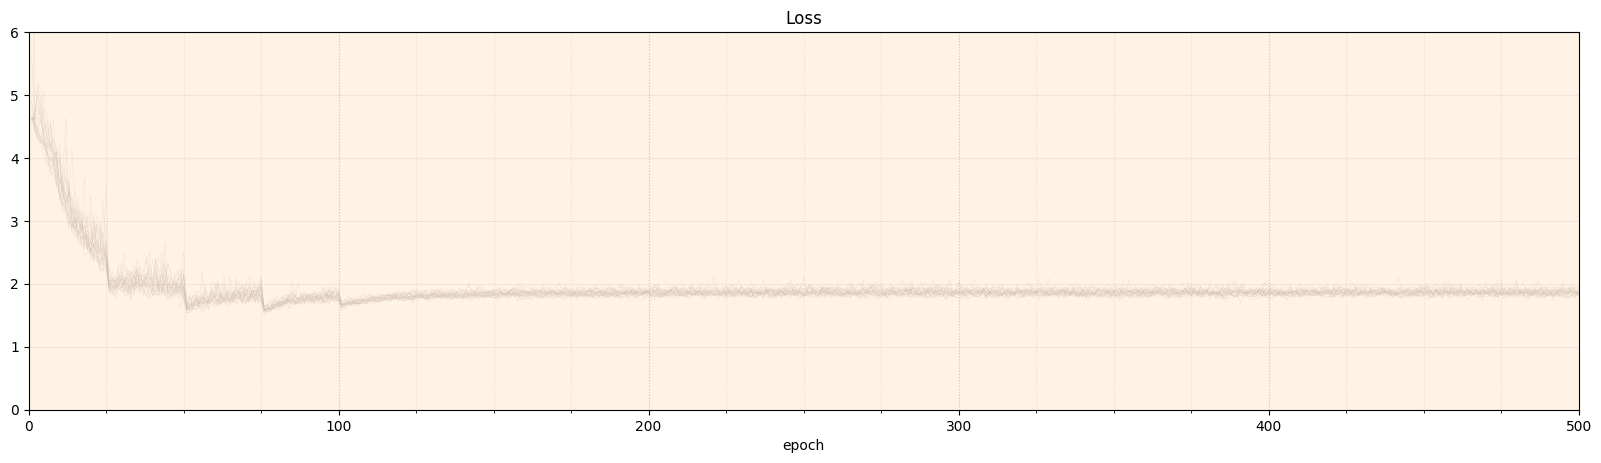

In [144]:
ax = plot(df_loss,legend=False,figsize=(20,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_ylim(0,6)
ax.set_facecolor("#FEF3E5")

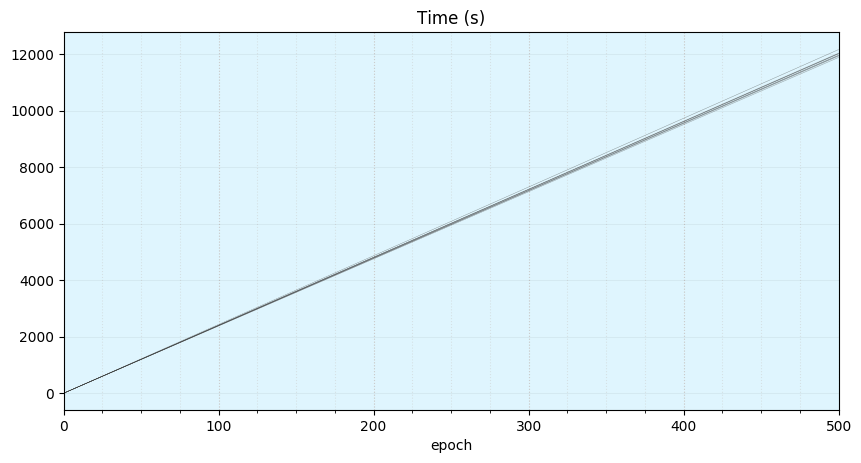

In [145]:
ax = plot(df_time,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Time (s)")
#ax.set_ylabel("s")
ax.set_facecolor("#00B7FA20")

In [146]:
def RelativePercentDifference(ser):
    mean = ser.mean()
    ser = ser.apply(lambda x: x/mean*100)
    return ser

In [147]:
slice_epoch = [20.,25.,40.,50.,200.,500.]
df_loss.iloc[-3:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
epoch,,,,,,,,,,,,,,,,,,,,,
498.0,1.81850,1.77527,1.93687,1.82462,1.84923,1.95358,1.86780,1.85001,1.91756,1.89987,...,1.98169,1.85344,1.87013,1.90598,1.83048,1.85849,1.90044,1.88531,1.90244,1.85244
499.0,1.89745,1.81274,1.88655,1.83448,1.77201,1.83881,1.87197,1.79381,1.94125,1.88105,...,1.86115,1.86008,1.87721,1.95533,1.83363,1.88904,1.85539,1.85424,1.91957,1.85388
500.0,1.80903,1.88877,1.88780,1.80966,1.87385,1.85546,1.84581,1.93995,1.95705,1.85687,...,1.85721,1.85332,1.87268,1.85428,1.89701,1.87049,1.81506,1.86928,1.91025,1.79743


In [148]:
df_loss_p = df_loss.copy()
df_acc_p = df_acc.copy()
df_time_p = df_time.copy()
i = 0
index = []
for i in range(0,len(slice_epoch)):
    name = str(int(slice_epoch[i]))
    index.append(name)
    df_loss_p.loc[name] = RelativePercentDifference(df_loss_p.loc[slice_epoch[i]])
    df_acc_p.loc[name] = RelativePercentDifference(df_acc_p.loc[slice_epoch[i]])
    df_time_p.loc[name] = RelativePercentDifference(df_time_p.loc[slice_epoch[i]])
df_loss_p.iloc[-5:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
epoch,,,,,,,,,,,,,,,,,,,,,
25,98.166332,97.037901,98.743734,97.346781,118.058531,98.895178,101.403380,108.315821,107.016367,101.502078,...,89.400611,92.236074,90.786376,101.727844,96.029346,142.838067,93.558305,94.685138,102.728807,98.168730
40,91.995265,95.674832,103.177340,96.940871,96.674390,100.377768,102.333314,104.221987,106.158281,106.068103,...,97.084244,91.646712,89.732708,121.464228,98.273277,104.388157,93.182271,95.062838,106.116232,100.618412
50,109.936009,98.440236,98.901841,108.664580,107.450096,105.847581,85.323304,90.186280,90.100611,100.562308,...,105.123426,96.380653,97.983671,88.955670,98.913431,127.256769,88.601403,112.914770,92.335564,96.816053
200,99.336423,99.868890,100.802714,95.294489,99.948626,95.993921,99.903674,99.062965,98.853724,100.234393,...,101.227618,99.880128,99.807884,97.635204,100.063682,100.689799,98.764890,101.116308,104.970942,101.203536
500,96.975312,101.249874,101.197876,97.009084,100.450069,99.464250,98.946950,103.993442,104.910109,99.539835,...,99.558061,99.349533,100.387350,99.400995,101.691590,100.269952,97.298558,100.205089,102.401337,96.353480


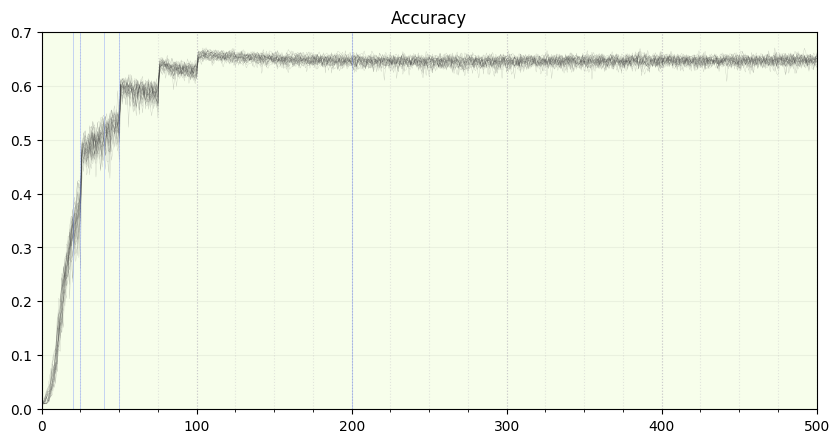

In [149]:
ax = plot(df_acc,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_facecolor("#F7FEEB")
ax.set_ylim(0,0.7)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [0,0.7]
    ax.plot(xx,yy,lw=0.5,color="#5577FF70",linestyle="-")

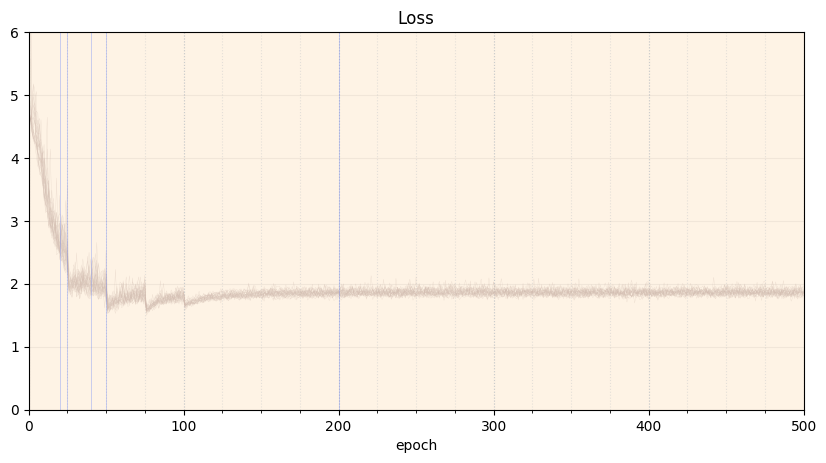

In [154]:
ax = plot(df_loss,legend=False,figsize=(10,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_facecolor("#FEF3E5")
ymin = 0 
ymax = 6
ax.set_ylim(ymin,ymax)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [ymin,ymax]
    ax.plot(xx,yy,lw=0.5,color="#5577FF70")

In [155]:
def plotBox(df, **kwargs):
    boxcolor=(.3,.3,.3)
    meanlineprops = dict(linewidth=1, color=(.7,.7,.8), linestyle="--")
    medianprops = dict(linestyle='-', linewidth=1)
    color = dict(caps=boxcolor,whiskers=boxcolor,boxes=boxcolor, medians=boxcolor)
    (ax,lines) = df.plot.box(showmeans=True, meanline=True, patch_artist=False,
                    color=color, meanprops=meanlineprops, medianprops=medianprops,
                    return_type='both',**kwargs)
#    print lines.keys()
    ax.yaxis.grid(linestyle=":",color="#cccccc")
# #     plotText(ax, lines)
# #     ["medians"],"median")
# #     plotText(ax, lines["means"],"mean")
# #     plotText(ax, lines["boxes"],"quartile")
# #     plotText(ax, lines["caps"],"caps")
# #    box = ax.artists[0]
#     #box.set_facecolor("#eeeeee")
    
#     for median in lines["medians"]:
#         x,y = median.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]-0.0001, 'median', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
#     for mean in lines["means"]:
#         x,y = mean.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]+0.0007, 'mean', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
    return ax

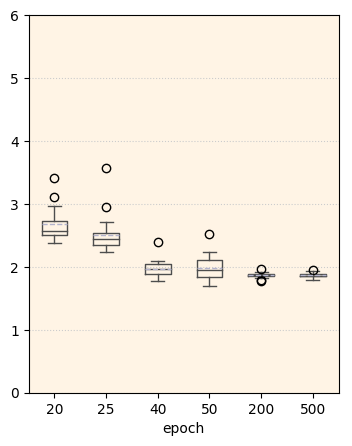

In [157]:
ax = plotBox(df_loss_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Loss")
ax.set_xlabel("epoch")
ymin = 0
ymax = 6
ax.set_ylim(ymin,ymax)
ax.set_xticklabels(df_loss_p.loc[slice_epoch].index.map(lambda x: str(int(x))))
ax.set_facecolor("#FFAC3620")

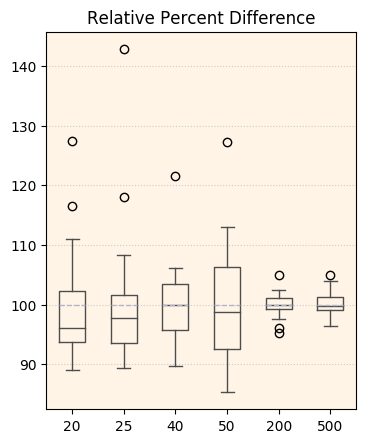

In [158]:
ax = plotBox(df_loss_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
ax.set_facecolor("#FFAC3620")

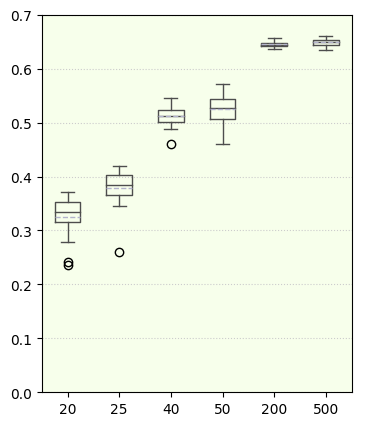

In [159]:
ax = plotBox(df_acc_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Accuracy")
#ax.set_xlabel("epoch")
ax.set_xticklabels(df_loss_p.loc[slice_epoch].index.map(lambda x: str(int(x))))
ax.set_ylim(0,0.7)
ax.set_facecolor("#CBFF7725")

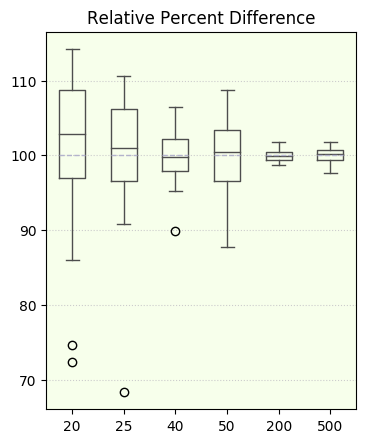

In [160]:
ax = plotBox(df_acc_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
#ax.set_xlabel("epoch")
ax.set_facecolor("#CBFF7725")